In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
hdline = pd.read_csv('all_other_files/df_ready.csv')

In [3]:
hdline

,v2_headline,period_start,price_direction
0,altcoins potential next ethereum bitcoin,2017-07-03,up
1,bitcoin fan held sign testimony receives effort,2017-07-10,down
2,bitcoin fan holds sign receives donations effort,2017-10-30,down
3,bitcoin mining usb devices large usb,2017-10-30,down
4,word blockchain made bitcoin illustration,2017-10-30,down
...,...,...,...
775,cardano close launching smart charles hoskinson,2021-05-17,down
776,blockstream buys adamant expansion bitcoin inv...,2021-05-17,down
777,huobi scales back due china bitcoin falls ethe...,2021-05-17,down
778,ether last ath rout resumes,2021-05-17,down


In [4]:
hdline['price_mvmt'] = [0 if i == 'down' else 1 for i in hdline['price_direction']]

In [5]:
hdline

,v2_headline,period_start,price_direction,price_mvmt
0,altcoins potential next ethereum bitcoin,2017-07-03,up,1
1,bitcoin fan held sign testimony receives effort,2017-07-10,down,0
2,bitcoin fan holds sign receives donations effort,2017-10-30,down,0
3,bitcoin mining usb devices large usb,2017-10-30,down,0
4,word blockchain made bitcoin illustration,2017-10-30,down,0
...,...,...,...,...
775,cardano close launching smart charles hoskinson,2021-05-17,down,0
776,blockstream buys adamant expansion bitcoin inv...,2021-05-17,down,0
777,huobi scales back due china bitcoin falls ethe...,2021-05-17,down,0
778,ether last ath rout resumes,2021-05-17,down,0


In [6]:
hdline = hdline.drop('price_direction', axis=1)

In [7]:
hdline

,v2_headline,period_start,price_mvmt
0,altcoins potential next ethereum bitcoin,2017-07-03,1
1,bitcoin fan held sign testimony receives effort,2017-07-10,0
2,bitcoin fan holds sign receives donations effort,2017-10-30,0
3,bitcoin mining usb devices large usb,2017-10-30,0
4,word blockchain made bitcoin illustration,2017-10-30,0
...,...,...,...
775,cardano close launching smart charles hoskinson,2021-05-17,0
776,blockstream buys adamant expansion bitcoin inv...,2021-05-17,0
777,huobi scales back due china bitcoin falls ethe...,2021-05-17,0
778,ether last ath rout resumes,2021-05-17,0


In [8]:
hdline_highs = hdline.groupby(by='period_start')['price_mvmt'].sum().sort_values(ascending=False)

In [9]:
hdline_highs.head(20)

period_start
2021-04-26    34
2021-03-01    21
2021-04-12    18
2021-05-03    16
2021-04-05    16
2021-03-08    15
2021-03-29    13
2020-11-09    10
2020-12-28     9
2021-02-15     9
2020-11-16     8
2021-02-08     7
2020-01-06     7
2018-04-02     6
2018-04-30     6
2018-04-09     6
2020-11-30     6
2020-03-23     6
2017-12-04     6
2018-05-28     6
Name: price_mvmt, dtype: int64

In [10]:
# Pull out year from each row to make it easier to group the years and make a visualization from it

hdline['period_year'] = [i[0:4] for i in hdline['period_start']]

In [11]:
hdline

,v2_headline,period_start,price_mvmt,period_year
0,altcoins potential next ethereum bitcoin,2017-07-03,1,2017
1,bitcoin fan held sign testimony receives effort,2017-07-10,0,2017
2,bitcoin fan holds sign receives donations effort,2017-10-30,0,2017
3,bitcoin mining usb devices large usb,2017-10-30,0,2017
4,word blockchain made bitcoin illustration,2017-10-30,0,2017
...,...,...,...,...
775,cardano close launching smart charles hoskinson,2021-05-17,0,2021
776,blockstream buys adamant expansion bitcoin inv...,2021-05-17,0,2021
777,huobi scales back due china bitcoin falls ethe...,2021-05-17,0,2021
778,ether last ath rout resumes,2021-05-17,0,2021


In [22]:
hdline_highs = hdline.groupby(by='period_year')['price_mvmt'].sum().sort_values(ascending=False)

In [23]:
hdline_highs

period_year
2021    157
2020    106
2018     61
2019     56
2017     19
Name: price_mvmt, dtype: int64

<AxesSubplot:xlabel='period_year', ylabel='price_mvmt'>

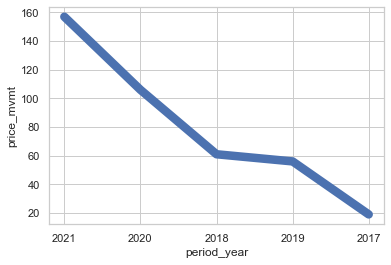

In [19]:
sns.lineplot(data=hdline_highs, palette="tab10", linewidth=8.5)